In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar el dataset
data = pd.read_csv('../data/processed/cangas_IU_2016x.csv')  # Reemplaza 'tu_ruta_al_archivo.csv' con la ruta a tu archivo de datos

# Convertir la columna 'fecha' a formato de fecha
data['fecha'] = pd.to_datetime(data['fecha'])

# Dividir los datos en características (X) y etiquetas (y)
X = data[['fecha', 'UI']]
y = data['abierto/cerrado']

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
X['dia'] = X['fecha'].dt.day
X['mes'] = X['fecha'].dt.month
X['año'] = X['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
X = X.drop('fecha', axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminar filas con valores NaN en los conjuntos de entrenamiento y prueba
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Asegurarse de que y_train tenga la misma longitud que X_train

X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Asegurarse de que y_test tenga la misma longitud que X_test

Características más importantes en el modelo:
  feature  importance
2     mes    0.551049
3     año    0.180209
0      UI    0.149874
1     dia    0.118868


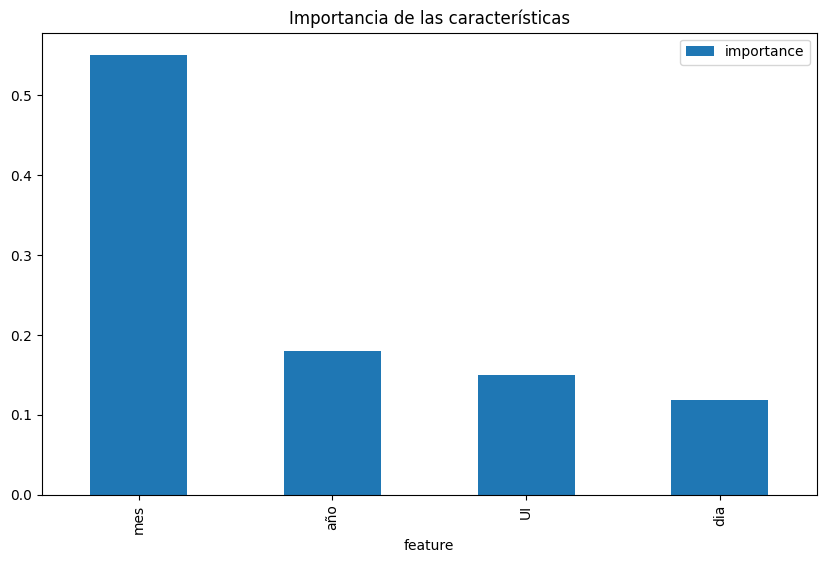

Precisión Árbol de Decisión: 95.28%


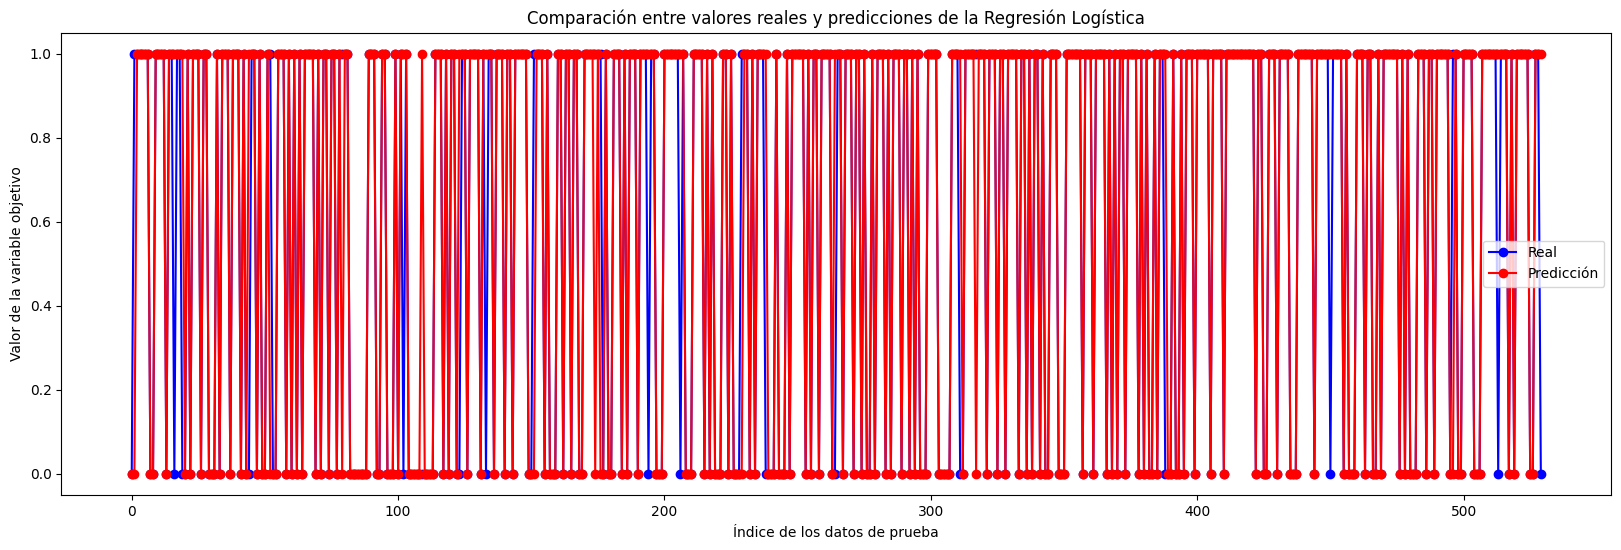

In [63]:

# Luego, puedes proceder con el entrenamiento y evaluación de los modelos.

from sklearn.ensemble import RandomForestClassifier
# Crear el modelo
decision_tree = RandomForestClassifier(random_state=14)


# Entrenar el modelo
decision_tree.fit(X_train, y_train)

# Características más importantes
feature_importances = decision_tree.feature_importances_
feature_names = X_train.columns

# Crear un dataframe con las características y sus importancias
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Ordenar el dataframe por importancia
importance_df = importance_df.sort_values(by='importance', ascending=False)

print("Características más importantes en el modelo:")
print(importance_df)

# Opcional: Graficar las importancias de las características
importance_df.plot.bar(x='feature', y='importance', figsize=(10, 6))
plt.title('Importancia de las características')
plt.show()

# Hacer predicciones
y_pred = decision_tree.predict(X_test)

# Calcular la precisión
precision_decision_tree = accuracy_score(y_test, y_pred)
print(f"Precisión Árbol de Decisión: {precision_decision_tree * 100:.2f}%")

# Graficar la diferencia entre valores reales y predicciones de la Regresión Logística
plt.figure(figsize=(20, 6))

# Graficar valores reales y predicciones
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones de la Regresión Logística')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()


Precisión de las predicciones en el conjunto de prueba: 85.33%


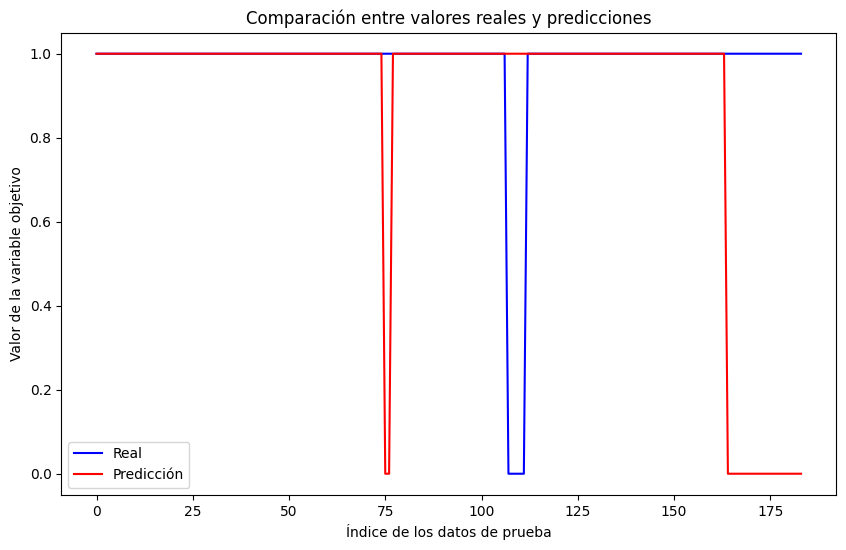

In [64]:
# Cargar el dataset
data2 = pd.read_csv('../data/processed/cangas_IU_2016.csv')  # Reemplaza 'tu_ruta_al_archivo.csv' con la ruta a tu archivo de datos

# Convertir la columna 'fecha' a formato de fecha
data2['fecha'] = pd.to_datetime(data2['fecha'])

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
data2['dia'] = data2['fecha'].dt.day
data2['mes'] = data2['fecha'].dt.month
data2['año'] = data2['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
data2 = data2.drop('fecha', axis=1)

data2 = data2.drop('abierto/cerrado', axis=1)
# Realizar la predicción usando el modelo entrenado
prediccion = decision_tree.predict(data2)

probabilidades = decision_tree.predict_proba(data2)

data3 = pd.read_csv('../data/processed/cangas_IU_2016.csv')

y_test_custom = data3['abierto/cerrado']

# Calcular la precisión
precision_custom = accuracy_score(y_test_custom, prediccion)
print(f"Precisión de las predicciones en el conjunto de prueba: {precision_custom * 100:.2f}%")

plt.figure(figsize=(10, 6))

# Graficar valores reales
plt.plot(y_test_custom.values, label='Real', color='blue', linestyle='-')

# Graficar predicciones
plt.plot(prediccion, label='Predicción', color='red', linestyle='-')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()

Epoch 1/2


C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.3952 - loss: 149.1915 
Epoch 2/2
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.5861 - loss: 28.1968
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Precisión de las predicciones en el conjunto de prueba: 46.20%


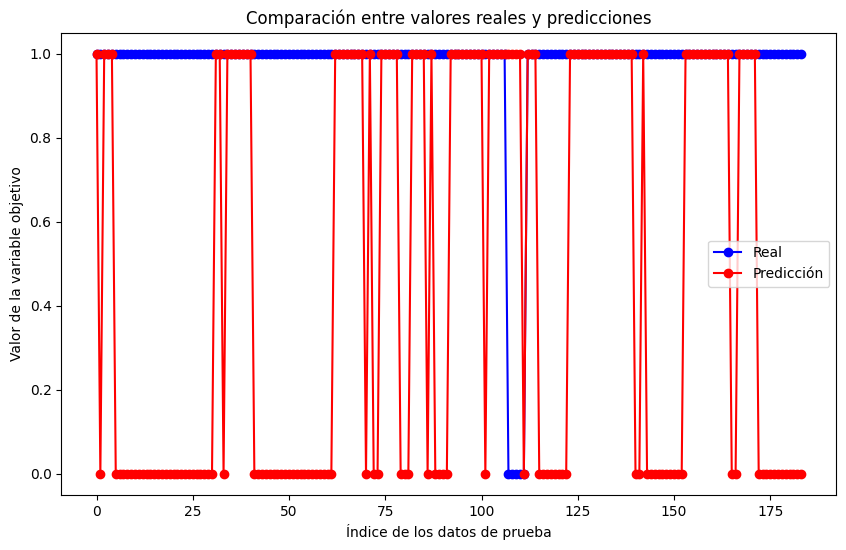

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar el dataset
data2 = pd.read_csv('../data/processed/cangas_IU_2016.csv')  # Reemplaza 'tu_ruta_al_archivo.csv' con la ruta a tu archivo de datos

# Convertir la columna 'fecha' a formato de fecha
data2['fecha'] = pd.to_datetime(data2['fecha'])

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
data2['dia'] = data2['fecha'].dt.day
data2['mes'] = data2['fecha'].dt.month
data2['año'] = data2['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
data2 = data2.drop('fecha', axis=1)

# Eliminar la columna 'abierto/cerrado' ya que no se necesita en las características para la predicción
data2 = data2.drop('abierto/cerrado', axis=1)

# Escalar las características
scaler = StandardScaler()
data2_scaled = scaler.fit_transform(data2)

# Cargar de nuevo el dataset para obtener y_train y y_test_custom
data3 = pd.read_csv('../data/processed/cangas_IU_2016.csv')
y_test_custom = data3['abierto/cerrado']

# Crear el modelo de la Red Neuronal Artificial (RNA)
model = Sequential()
model.add(Dense(32, input_dim=data2_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=2, batch_size=100, verbose=1)

# Realizar la predicción usando el modelo entrenado
prediccion = model.predict(data2_scaled)
prediccion = (prediccion > 0.5).astype(int).flatten()

# Calcular la precisión
precision_custom = accuracy_score(y_test_custom, prediccion)
print(f"Precisión de las predicciones en el conjunto de prueba: {precision_custom * 100:.2f}%")

plt.figure(figsize=(10, 6))

# Graficar valores reales
plt.plot(y_test_custom.values, label='Real', color='blue', linestyle='-', marker='o')

# Graficar predicciones
plt.plot(prediccion, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()



Epoch 1/2


C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5780 - loss: 0.7307  
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6152 - loss: 0.6939 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Precisión de las predicciones en el conjunto de prueba: 62.50%


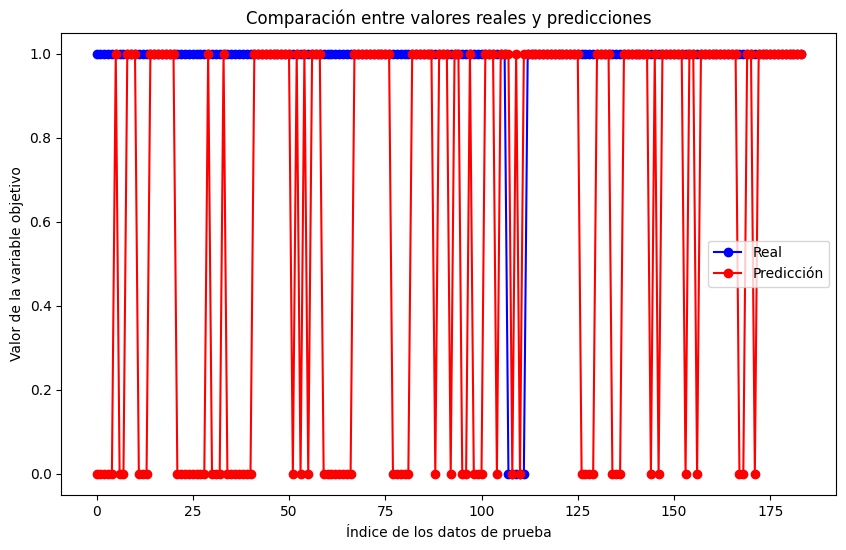

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar el dataset
data2 = pd.read_csv('../data/processed/cangas_IU_2016.csv')

# Convertir la columna 'fecha' a formato de fecha
data2['fecha'] = pd.to_datetime(data2['fecha'])

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
data2['dia'] = data2['fecha'].dt.day
data2['mes'] = data2['fecha'].dt.month
data2['año'] = data2['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
data2 = data2.drop('fecha', axis=1)

# Eliminar la columna 'abierto/cerrado' ya que no se necesita en las características para la predicción
data2 = data2.drop('abierto/cerrado', axis=1)

# Escalar las características
scaler = StandardScaler()
data2_scaled = scaler.fit_transform(data2)

# Cargar de nuevo el dataset para obtener y_train y y_test_custom
data3 = pd.read_csv('../data/processed/cangas_IU_2016.csv')
y_test_custom = data3['abierto/cerrado']

# Crear el modelo de la Red Neuronal Artificial (RNA)
model = Sequential()
model.add(Dense(29, input_dim=data2_scaled.shape[1], activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(data2_scaled, y_test_custom, epochs=2, batch_size=100, verbose=1)

# Realizar la predicción usando el modelo entrenado
prediccion = model.predict(data2_scaled)
prediccion = (prediccion > 0.5).astype(int).flatten()

# Calcular la precisión
precision_custom = accuracy_score(y_test_custom, prediccion)
print(f"Precisión de las predicciones en el conjunto de prueba: {precision_custom * 100:.2f}%")

plt.figure(figsize=(10, 6))

# Graficar valores reales
plt.plot(y_test_custom.values, label='Real', color='blue', linestyle='-', marker='o')

# Graficar predicciones
plt.plot(prediccion, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()


Precisión de las predicciones en el conjunto de prueba: 100.00%


C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


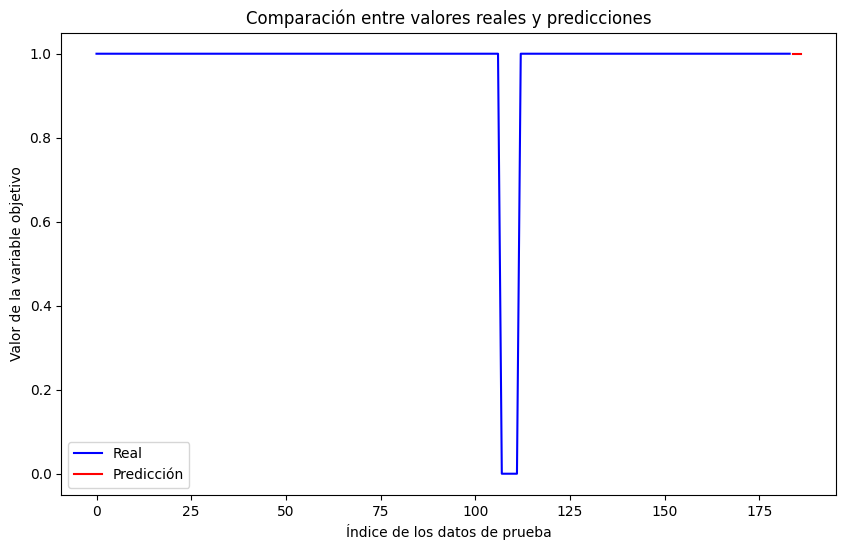

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import accuracy_score

# Cargar el dataset
data2 = pd.read_csv('../data/processed/cangas_IU_2016.csv')

# Convertir la columna 'fecha' a formato de fecha
data2['fecha'] = pd.to_datetime(data2['fecha'])

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
data2['dia'] = data2['fecha'].dt.day
data2['mes'] = data2['fecha'].dt.month
data2['año'] = data2['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
data2 = data2.drop('fecha', axis=1)

# Entrenar el modelo ARIMA
model = ARIMA(data2['abierto/cerrado'], order=(5,1,0))  # Ajusta el orden del modelo ARIMA según sea necesario
model_fit = model.fit()

# Realizar la predicción
prediccion = model_fit.predict(start=len(data2), end=len(data2) + 3 - 1, typ='levels')  # Reemplaza 'n_muestras_a_predecir' con el número de muestras que deseas predecir

# Cargar los datos reales
data3 = pd.read_csv('../data/processed/cangas_IU_2016.csv')
y_test_custom = data3['abierto/cerrado']

# Convertir las probabilidades en clases (abierto/cerrado)
prediccion_clases = (prediccion > 0.5).astype(int)

# Calcular la precisión
precision_custom = accuracy_score(y_test_custom[-len(prediccion_clases):], prediccion_clases)
print(f"Precisión de las predicciones en el conjunto de prueba: {precision_custom * 100:.2f}%")

# Graficar los valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.plot(y_test_custom.values, label='Real', color='blue', linestyle='-')
plt.plot(prediccion_clases, label='Predicción', color='red', linestyle='-')
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()
plt.show()


In [68]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Cargar los datos
data = pd.read_csv('../data/processed/cangas_IU_2018.csv')

# Convertir la columna 'fecha' a formato de fecha
data['fecha'] = pd.to_datetime(data['fecha'])

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
data['dia'] = data['fecha'].dt.day
data['mes'] = data['fecha'].dt.month
data['año'] = data['fecha'].dt.year

# Separar las características (X) y la variable objetivo (y)
X = data.drop(['fecha', 'abierto/cerrado'], axis=1)
y = data['abierto/cerrado']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Función para crear el modelo de la red neuronal
def create_model(trial):
    # Definir hiperparámetros a optimizar
    neurons = trial.suggest_int('neurons', 16, 64)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop'])
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)

    # Construir el modelo de la red neuronal
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(tf.keras.layers.Dense(16, activation=activation))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compilar el modelo
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Definir la función objetivo para Optuna
def objective(trial):
    # Crear el modelo
    model = create_model(trial)
    
    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
    
    # Evaluar el modelo en el conjunto de prueba
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    return accuracy

# Crear el estudio de Optuna y optimizar los hiperparámetros
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Imprimir los mejores hiperparámetros y el mejor valor de precisión
print(f"Mejores hiperparámetros: {study.best_params}")
print(f"Mejor precisión: {study.best_value}")


[I 2024-05-28 13:17:14,719] A new study created in memory with name: no-name-cee01c71-641a-4d4e-85f6-fb8e059824e9
C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2024-05-28 13:17:17,513] Trial 0 finished with value: 0.6279069781303406 and parameters: {'neurons': 50, 'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 5.756931368631286e-05}. Best is trial 0 with value: 0.6279069781303406.
[I 2024-05-28 13:17:20,009] Trial 1 finished with value: 0.6511628031730652 and parameters: {'neurons': 49, 'activation': 'tanh', 'optimizer': 'rmsprop', 'learning_rate': 4.989260191631162e-05}. Best is trial 1 with 

KeyboardInterrupt: 